*TITANIC ANALYSIS INDEX*
===

- [0.History](#0.History)
- [1.Column Description](#1.Column-Description)
- [2.Encoding](#2.Encoding)
    - [2.1 Sex](#2.1-Sex)
    - [2.2 Embarked](#2.2-Sex)
- [3.Correlations](#3.Correlations)
    - [3.1 Pearson](#3.1-Pearson)
    - [3.2 Kendall](#3.2-Kendall)
    - [3.3 Spearman](#3.3-Spearman)
    - [3.4 Detailed Correlation](#3.4-Detailed-Correlation)

NOTE CONFOUNDING VARIABLES
- un fattore che può aver inciso è il titolo di studio perchè può essere un indice di consapevolezza
- l'etnia dei passeggeri può avere in qualche modo influito sulla consapevolezza?
- la posizione all'interno della nave soprattutto per la 3° classe può aver influito perchè i percorsi di risalita per il raggiungimento del livello delle barche di salvataggio era complicato
- sailing crew and non sailing crew?
- numero scialuppe per classe?
- il numero di componenti della famiglia influisce sulla cabina?
- il costo del biglietto influisce sulla cabina?
- distribuzione famiglie numerose per classe

0.History
===


But by far the largest group of passengers was in Third Class: more than 700, exceeding the other two levels combined. Some had paid less than 20 to make the crossing.

In compliance with the law of the sea, women and children boarded the boats first.Yet many of the victims were in fact women and children.

Gaining a bit more understanding of the problem context can provide several clues about the importance of variables, and help us make more sense of some of the relations that will be uncovered during our exploratory data analysis. So it's worth spending some time learning about what happened the night the Titanic sank (we can think of this as gaining some domain expertise). There are countless books, documentaries, and webpages dedicated to this subject. Here we highlight a few interesting facts:

<ul>   
    <li>The Titanic's officers issued a "women and children first" order for evacuating passengers via lifeboats. However, there was no organized evacuation plan in place.</li>
    <li>There was in fact no general "abandon ship" order given by the captain, no public address system, and no lifeboat drill. Many passengers did not realize they were in any imminent danger, and some had to be goaded out of their cabins by members of the crew or staff.</li>
    <li>Lifeboats were segregated into different class sections, and there were more 1st-class passenger lifeboats than for the other two classes.The lifeboats were launched from the First Class decks first and the Second Class decks second. There were no decks or lifeboats dedicated to the Third Class ??????</li>
    <li>First Class suites, berths, and social rooms were located principly on the center of the ship on decks A, B, and C (or more poetically the Boat Deck, Promenade Deck and Bridge Deck), with additional cabins on decks D and E. They had either immediate or easy access to the Boat Deck where all of the lifeboats were housed. Lifeboats numbered 1 through 8, which were the first to be launched, were located in the fore of the ship, the First Class Deck. The numbers indicate that First Class Passengers utilized any lifeboat available without compunction.</li>
    <li>Second Class rooms were mostly located on decks D and E, with some on lower decks F and G. Where Second Class passengers were on the same deck as First Class passengers, the Second Class passengers were further aft. Some Second Class passengers would have had easy access through a stairway to the stern of the Boat Deck (Second Class Deck) where lifeboats numbered 9 through 16 were located. More by cultural than physcial barriers, the Second Class passengers would have been prohibited from entering the First Class section of the Boat Deck.</li>
    <li>By law, passed for public health reasons, gates separating steerage passengers from the other passengers had to be locked. Back then steerage passengers were equated with emigrants who were equated with disease and pestilence, and it was thought important to give passengers in more luxurious accommodations peace of mind that the ship would not breed contagion or other hazards to their well-being. The locked gates proved to be the most deadly, but there were other measures used on steerage passengers alone. Before boarding, steerage passengers had to submit to a health inspection, for at least obvious signs of infection, lice, or disease.As a public health measure, the public toilets in steerage had an automatic flushing feature.</li>
    <li>We know it was more difficult for 3rd class passengers to access lifeboats, because the 3rd-class passenger sections were gated off from the 1st and 2nd-class areas of the ship. This was actually due to US immigration laws, which required immigrants (primarily 3rd-class) to be segregated and processed separately from other passengers upon arrival to the US. As a consequence, 3rd-class passengers had to navigate through a maze of staircases and corridors to reach the lifeboat deck.</li>
</ul>
Given these facts, we can already surmize that Sex, Pclass, and Age are likely to be the most important features. We will see what trends our Exploratory Data Analysis reveals.

Conerning the Fare feature: Fare is given in Pounds Sterling. There were really no 'standard' fares - many factors influenced the price charged, including the cabin size and number of people sharing a cabin, whether it was on the perimeter of the ship (i.e. with a porthole) or further inside, the qualities of the furnishings and provisions, etc. Children travelled at reduced rates, as did servants with 1st-class tickets. There seemed also to have been some family discount rates given, but we lack detailed information on how this was calculated. However, our research does tell us that:

Ticket price (Fare) was cumulative, and included the cost for all passengers sharing that ticket.

A Quick Glance at the Sorted CSV File
Several useful observations can be made by quickly glancing at the CSV file containing the combined training and test data, and sorting some of the entries. Don't underestimate the usefulness of this rather rudimentary step!

Findings:

<ul>   
    <li>Sort by Passenger Name: Passengers with matching surnames tend to also have matching entries for several other features: Pclass, Ticket, Fare, and Embarked (in addition to Cabin when available). This tells us we can use matching Ticket and Fare information as a basis for grouping families. If we sort by ticket, we can use surnames to distinguish between 'family' groups and non-related co-travellers. </li>
    <li>Sort by Age: All entries with the title 'Master' in the name correspond to males under the age of 15. This can be useful in helping us impute missing age data.</li>
    <li>Sort by Cabin: We find that Cabin number is available for most passengers with PClass=1, but generally missing for passengers of Pclass=2 or 3.</li>
    <li>Sort by Ticket Names: (I.Tickets not containing letters.) Tickets with 4-digits correspond to Pclass 2 or 3; the vast majority of 5-digit tickets correspond to Pclass 1 or 2; for 6-digit and 7-digit tickets, the leading number matches the Pclass. (II. Tickets including letters.) Tickets beginning with A/4 correspond to passengers with embarked=S and PClass=3. Tickets beginning with C.A. or CA also correspond to embarked=S, with PClass of 2 or 3. All tickets beginning with PC correspond to PClass=1. These patterns might be useful for helping us spot inconsistencies in the data.</li>
</ul>  

1.Column Description
===

<ul>   
    <li><b>pclass</b>: A proxy for socio-economic status (SES)</li>
        <ul>
          <li>1st = Upper</li>
          <li>2nd = Middle</li>
          <li>3rd = Lower</li>
        </ul>
    <li><b>age</b>: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5</li>
    <li><b>sibsp</b>: is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler.</li>
    <li><b>parch</b>: Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with.</li>
    <li><b>ticket</b>:	Ticket number	</li>
    <li><b>fare</b>:	Passenger fare o tariffa</li> 
    <li><b>cabin</b>:	Cabin number	</li>
    <li><b>embarked</b>:	Port of Embarkation. Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import warnings
#import plotly.express as px

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#from xgboost import XGBClassifier
import warnings

#import plotly.express as px
#from plotly.subplots import make_subplots
#import plotly.figure_factory as ff
#import plotly.offline as offline
#import plotly.graph_objs as go

test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
df_data = pd.concat([train, test], sort=True).reset_index(drop=True)
df_data_train = train.copy()
df_data_1 =df_data.copy()

In [2]:
df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
df_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Encoding
===

Since the string data does not go well with the machine learning algorithms, I needed to convert the non-numeric data to numeric data. I used LabelEncoder to encode the ‘Sex’ column. The label encoder would substitute ‘male’ values with some number and ‘female’ values with some different number.
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
For the other categorical data, I used Pandas’ dummies. It adds columns corresponding to all the possible values. So, if there could be three embarkment values — Q, C, S, the get_dummies method would create three different columns and assign values 0 or 1 depending on the embarking point.

2.1 Sex
---

Utilizziamo come convenzione male = 0 e female = 1

In [5]:
df_data_1['Sex'] = df_data_1['Sex'].replace(['male'], '0')
df_data_1['Sex'] = df_data_1['Sex'].replace(['female'], '1')
df_data_1['Sex'] = df_data_1['Sex'].astype("int64")
df_data_train['Sex'] = df_data_train['Sex'].replace(['male'], '0')
df_data_train['Sex'] = df_data_train['Sex'].replace(['female'], '1')
df_data_train['Sex'] = df_data_train['Sex'].astype("int64")

In [6]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [7]:
df_data_1.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


2.2 Embarked
---

In [8]:
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['C'], '0')
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['Q'], '1')
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['S'], '2')
#Devo usare il float perchè la conversione da float NaN a int dà errore
df_data_1['Embarked'] = df_data_1['Embarked'].astype("float64")
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['C'], '0')
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['Q'], '1')
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['S'], '2')
#Devo usare il float perchè la conversione da float NaN a int dà errore
df_data_train['Embarked'] = df_data_train['Embarked'].astype("float64") 

In [9]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   float64
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 122.8+ KB


3.Correlations
===

3.1 Pearson
---

La correlazione di Pearson è utilizzabile con due assunzioni:
<ul>
   <li>la distribuzione dei dati è gaussiana</li>
    <li>la rappresentazione cartesiana è <b>lineare</b></li>
</ul> 
Quindi il primo punto debole di questa correlazione è che un legame non lineare viene interpretato come correlazione 0!
E' il tipo di correlazione più semplice e basato sulla relazione: 


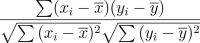

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.56</li>
    <li> Sex e Survived : 0.54</li>
    <li> PClass e Age : 0.41</li>
    <li> PClass e Survived : 0.34</li>
    <li> Parch e SibSp : 0.37</li>
</ul> 

<AxesSubplot:>

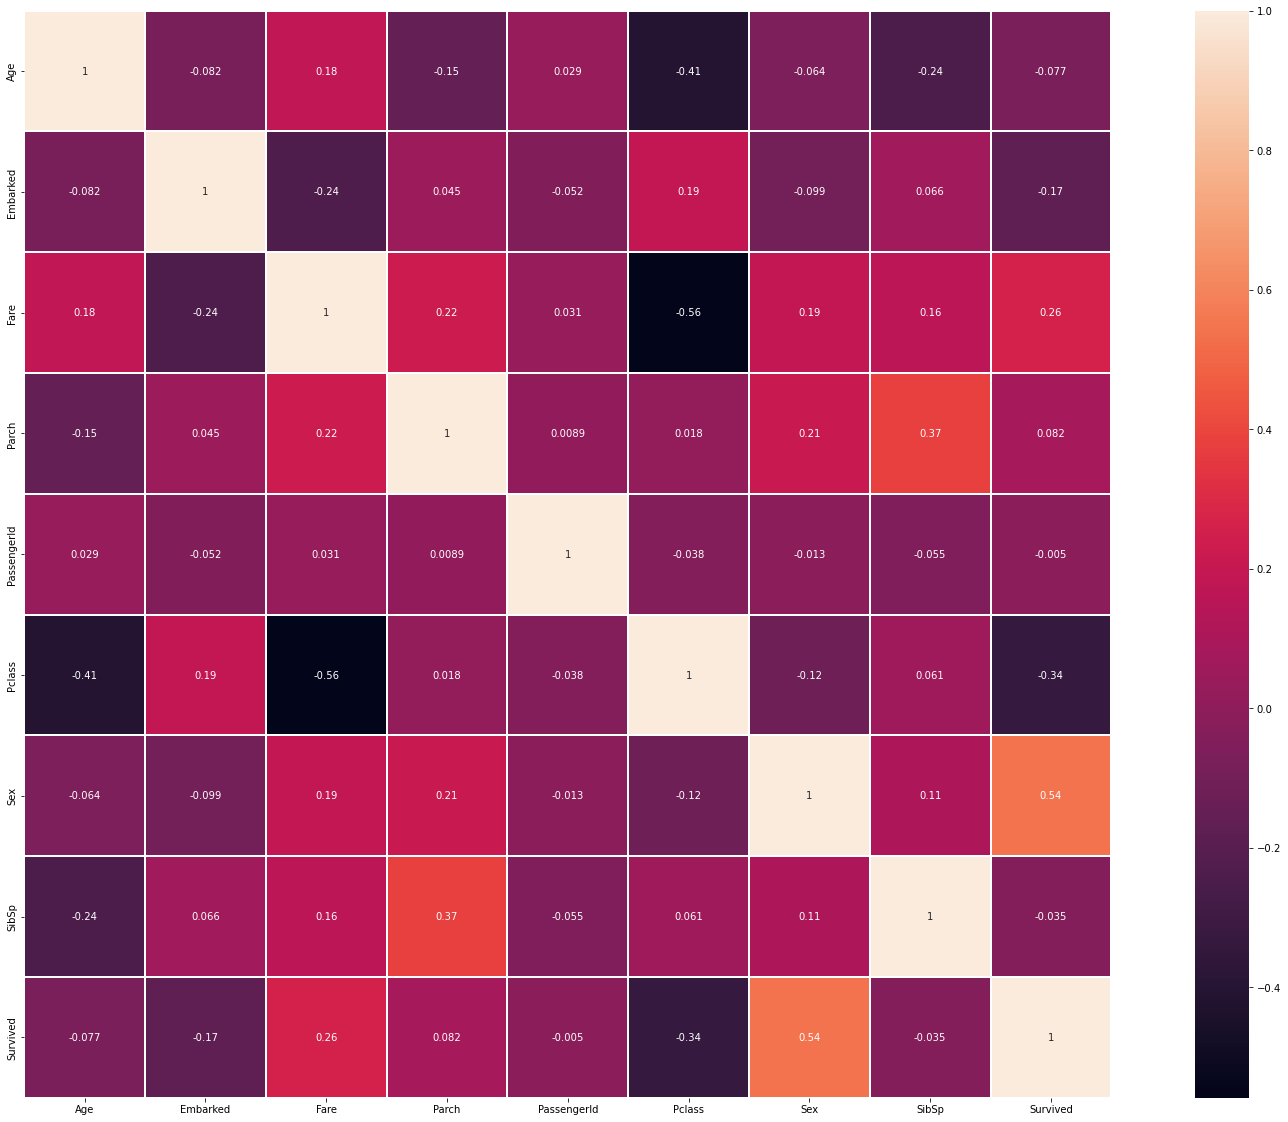

In [10]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='pearson'))
f,ax = plt.subplots(figsize=(30,20),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket')

3.2 Kendall
---

La correlazione di Kendall invece segue un approccio diverso
 
<ol>
  <li>Ranking: si ordinano i dati secondo la variabile indipendente</li>
  <li>Primo Compare: si confronta la prima variabile indipendente in cima alla tabella ordinata con tutti gli altri sample indipendenti x<sub>i+1</sub> > x<sub>i</sub> </li>
  <li>Secondo Compare: si confronta la prima variabile dipendente associata alla prima variabile indip. con la successiva variabile dipendente verificando se y<sub>i+1</sub> > y<sub>i</sub> </li>
  <li>Concorde o Discorde: se x<sub>i+1</sub> > x<sub>i</sub> e y<sub>i+1</sub> > y<sub>i</sub> sono entrambe vere si incrementa un valore <b>Nc</b> (numero di check concordi)   altrimenti s'incrementa <b>Nd</b> (numero di check discordi) </li> 
  <li>Si eseguono i passi 2 e 3 scorrendo la tabella verso il basso, fissando ogni volta una coppia di variabili dip. e indip. e confrontandole con tutte le altre</li> 
</ol>     

Questo tipo di correlazione è perciò un po' più grossolana perchè non dà una percezione profonda della curva che stiamo analizzando ma il vantaggio è che la relazione potrebbe anche essere<b> non lineare</b>

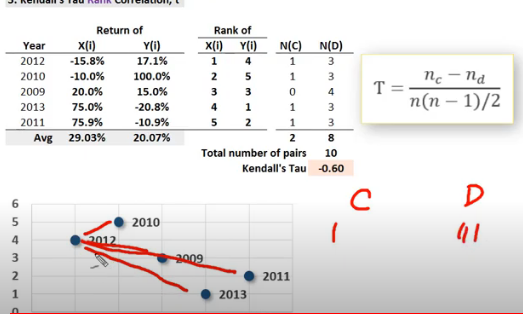

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.85</li>
    <li> PClass e Survived : 0.71</li>
    <li> Age e Parch : 0.68</li>       
    <li> Age e PClass : 0.61</li> 
    <li> Age e SibSp : 0.57</li>
    <li> Age e Survived : 0.55</li>
</ul> 

<AxesSubplot:>

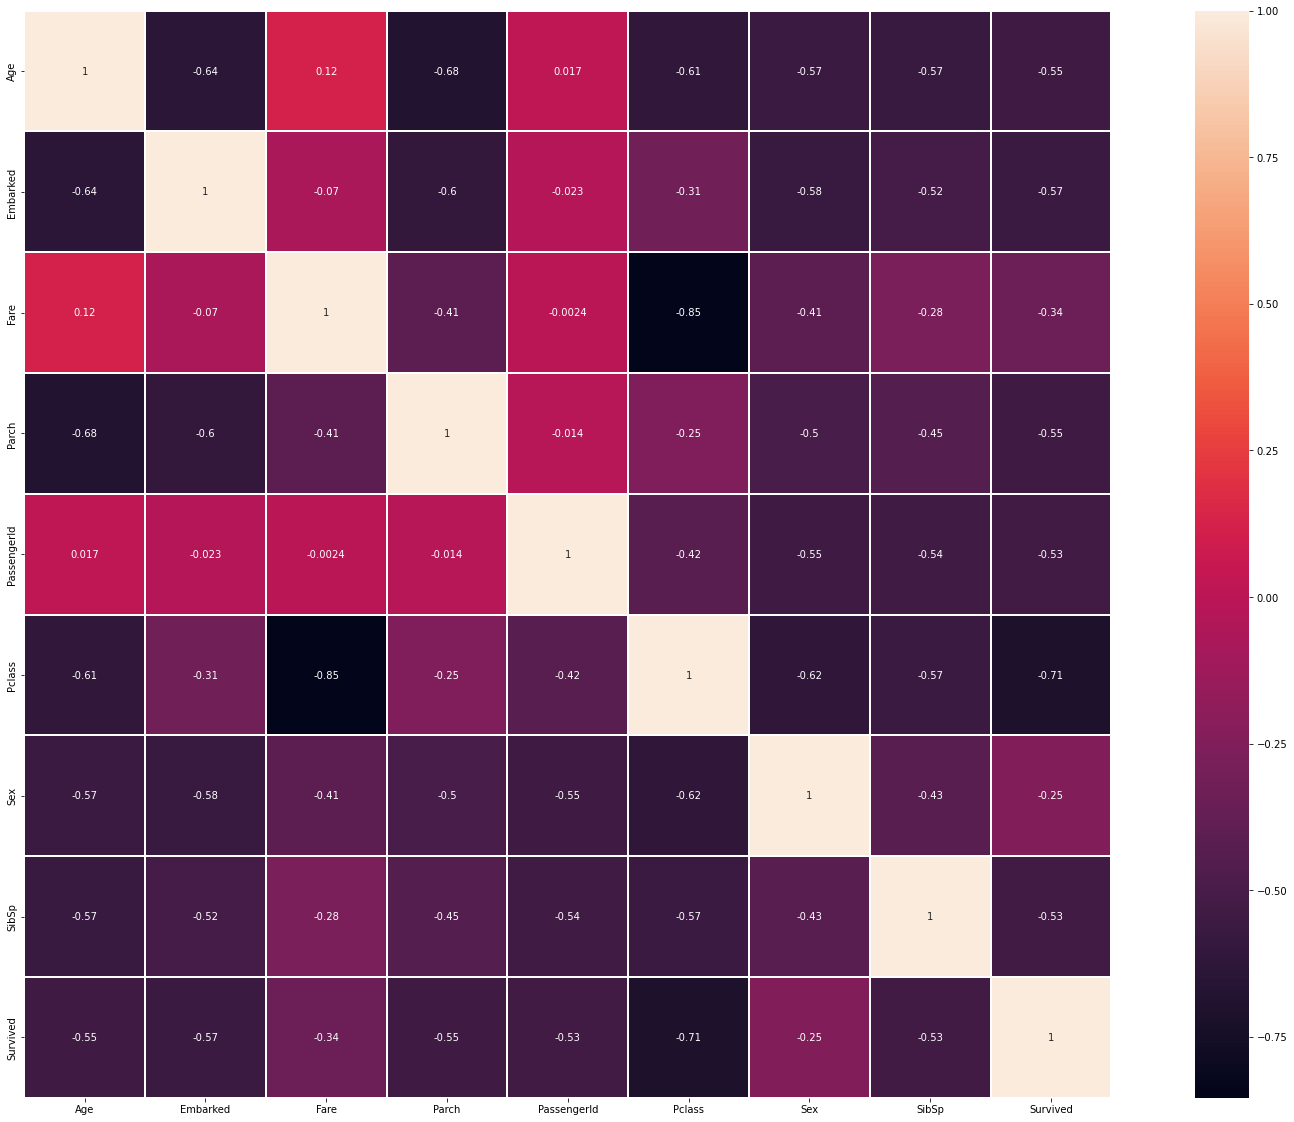

In [11]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='kendall'))
f,ax = plt.subplots(figsize=(30,20),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket')

3.3 Spearman
---

La correlazione di Spearman è simile a quella di Pearson con la differenza che il sample da confrontare viene ordinato. Successivamente si calcola la distanza tra due set di campioni per mezzo di una semplice differenza portata poi al quadrato. La correlazione di Spearman è molto più sensibile alle variazioni dei dati rispetto alla correlazione di Kendall. Sotto un esempio:

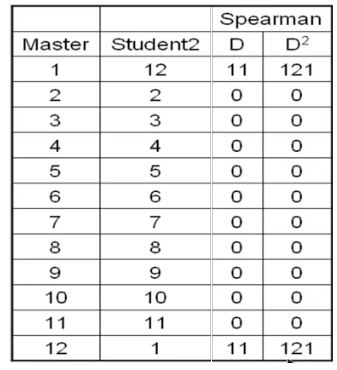

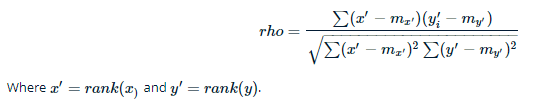

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.71</li>
    <li> PClass e Fare : 0.54</li>
    <li> SibSp e Fare : 0.45</li>
    <li> SibSp e Parch : 0.44</li>       
    <li> Age e PClass : 0.4</li> 

</ul> 

<AxesSubplot:>

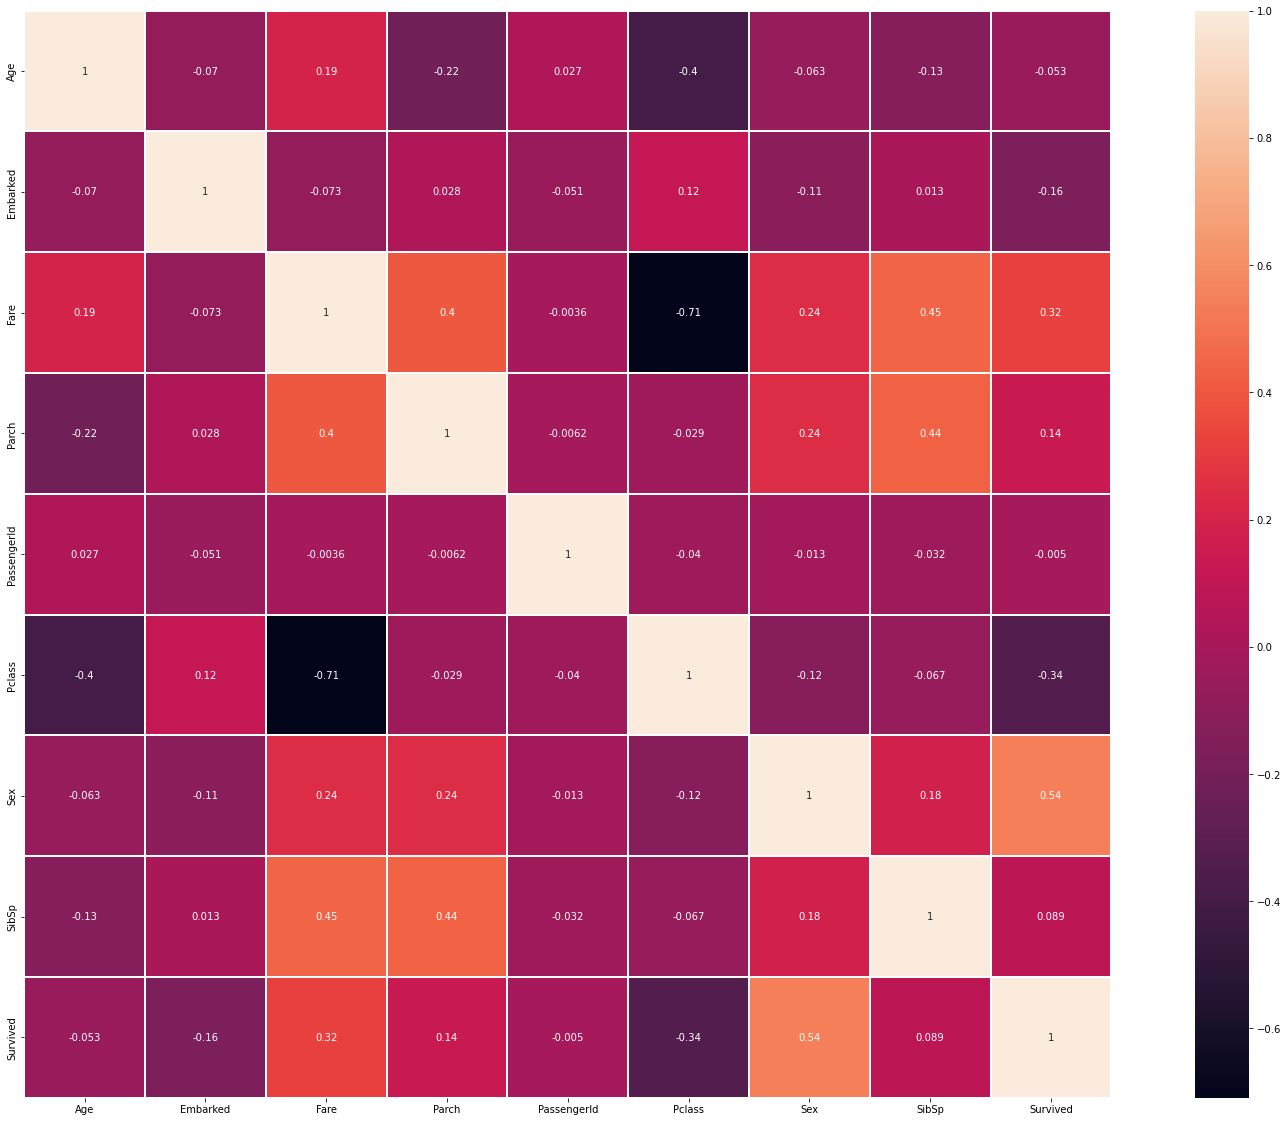

In [12]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='spearman'))
f,ax = plt.subplots(figsize=(30,20),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket')

4.Data imputation
===

Innanzi tutto verifico se ci sono dei campi vuoti nella tabella

In [13]:
cols_with_missing = [col for col in df_data_1.columns if df_data_1[col].isnull().any()] 
pd.isnull(df_data_1[cols_with_missing]).sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

E' necessario sostituire i campi vuoti con dei valori che abbiano un senso logico.

4.1 Age Missing Values
---

E' interessante verificare come è distrubita l'età in funzione delle classi. Per fare questo usiamo dei grafici molto interessanti, chiamati <b>violin plot</b> perchè somigliano nella forma proprio a dei violini.
Questi grafici sono molto interessanti perchè racchiudono parecchie informazioni:
<ul>
    <li><b>Distribuzione</b>:queste forme non vi ricordano qualcosa? Ma guarda un po' delle <b>gaussiane</b> o anche denominate curve a campana! Bisogna farci un po' l'occhio perchè le curve vengono specchiate (non so per quale motivo perchè basterebbe guardarne metà)</li>
    <li><b>Media</b>:a occhio possiamo già vedere che per le Classi meno abbienti 2 e 3, la media d'età è piuttosto bassa che può essere ragionevole</li>
    <li><b>Deviazione standard</b> : anche questo parametro importantissimo si nota ad occhio quanto sia differente nelle tre curve. Nella Classe 1 la deviazione è più ampia cioè l'intervallo d'età è più distribuito. Nelle Classi 2 e 3 invece la deviazione è più ridotta quindi il range d'età è più ridotto </li>
</ul>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

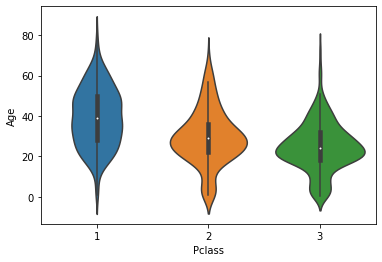

In [14]:
sns.violinplot(x='Pclass', y="Age", data=df_data_1)

Per farvi render conto di quanto sia importante rappresentare nel modo più sintetico i dati vi mostro un altro modo per visualizzare i dati di Age e Pclass:

<AxesSubplot:xlabel='Age', ylabel='Count'>

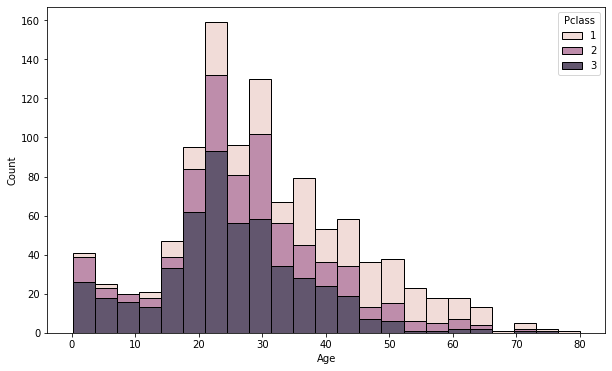

In [15]:
dimensions = (10, 6)
fig, ax = plt.subplots(figsize=dimensions)
sns.histplot(ax = ax, data=df_data_1, x="Age" , hue="Pclass",multiple="stack")

Anche qui si possono fare delle considerazioni ma risultano un po' più sparse. Chiaro il discorso? In questa rappresentazione si vede meglio quale sia la proporzione tra le classi

To address the problem of missing values for the **<span style='color:#F1C40F'>Age</span>** field we will proceed as follows. Since **<span style='color:#F1C40F'>PClass</span>** is the variable that is **<span style='color:#F1C40F'>most correlated</span>** with both Age and Survived, we will group passengers according to the class they belong to. What we will do is replace the missing values with the **<span style='color:#F1C40F'>median</span>** of each group. In fact, what is more, within each of the existing classes we will make a **<span style='color:#F1C40F'>gender distinction</span>**. We do this because, as we will see below, the median of Age varies according to whether the passenger is male or female.

In [16]:
sr_mediana = df_data_1.groupby(['Sex', 'Pclass']).median()['Age']
sr_mediana
#for i in range(0,sr_mediana.shape[0]):
#    if i<3: 
#        print('Median age for female of class {}: {}'.format(i+1,sr_mediana[1][i+1]))
#    else:
#        print('Median age for male of class {}: {}'.format(i+1-3,sr_mediana[0][i+1-3]))
df_data_1.Age = df_data_1.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
#print('Missing values for Age: {}'.format(df_data.Age.isnull().sum()))

4.2 Embarked Missing Values
---

Negli imbarcati 2 solo campi sono vuoti. Sostituiamo i vuoti con il valore più frequente, ossia la moda. In questo caso la moda è 2.

In [17]:
df_data_1.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [18]:
df_data_1.Embarked.fillna(df_data_1.Embarked.mode()[0], inplace = True)
pd.isnull(df_data_1).sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [19]:
df_data_1.shape[1]

12

4.3 Class, Age and Sex
---

Per capire i dati che seguono è utile capire un po' di più sullo scopo del Titanic. Su Wikipedia viene mostrato il percorso che avrebbe dovuto fare il transatlantico: partenza Southampton, raccolta passeggeri a Cherbourg e Queenstown e destinazione New York. In quale posto migliore si poteva approdare per trovare un posto di lavoro  in America?

Per questo il transatlantico era per la maggior parte composto da immigranti in cerca di fortuna. E' molto probabile quindi che gli immigranti fossero intere famiglie.

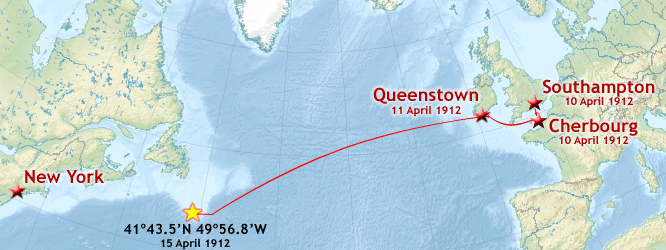

Vediamo il numero di passeggeri suddiviso per classe ..

In [20]:
sr_Age_Pclass1 = (df_data_1['Pclass']==1).sum()
sr_Age_Pclass2 = (df_data_1['Pclass']==2).sum()
sr_Age_Pclass3 = (df_data_1['Pclass']==3).sum()


In [21]:
d_Age_Pclass = {'Passengers per Pclass':[sr_Age_Pclass1, sr_Age_Pclass2, sr_Age_Pclass3] }
sr_Age_Pclass = pd.DataFrame(data=d_Age_Pclass , index=[1, 2, 3])  
sr_Age_Pclass

,Passengers per Pclass
1,323
2,277
3,709


.. e diviso per sesso, poi li raggruppiamo..

In [22]:
sr_Sex_Pclass1 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==1].count()) 
sr_Sex_Pclass2 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==2].count()) 
sr_Sex_Pclass3 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==3].count()) 
sr_Sex_Pclass1 

Sex
0    179
1    144
Name: Pclass, dtype: int64

Ora creiamo una tabella riassuntiva per capire la percentuale di passeggeri suddivisa per sesso e classe e la combiniamo con la rappresentazione della funzione di distribuzione dell'età per ciascuna delle categorie (2 sessi x 3 classi). 

Rappresentare la distribuzione dell'età significa concepire l'età come una distribuzione gaussiana , calcolandone i due parametri che la caratterizzano: Media e Deviazione standard.

In [23]:
#NOTA1: dfAgeSexPclassStat[dfAgeSexPclassStat.index.values[i]]
#NOTA2: dfAgeSexPclassStat.loc[0][0:3] seleziona Mean e StdDev per gli uomini

In [24]:
df_AgeSexPclassMean=df_data_1.groupby((['Sex', 'Pclass'])).mean()['Age']
df_AgeSexPclassMean=df_AgeSexPclassMean.rename('Mean')
df_AgeSexPclassStd=df_data_1.groupby((['Sex', 'Pclass'])).std()['Age']
df_AgeSexPclassStd=df_AgeSexPclassStd.rename('StdDev')

In [25]:
dfAgeSexPclassStat = pd.concat([df_AgeSexPclassMean,df_AgeSexPclassStd] , axis = 1)
dfAgeSexPclassStat 

Mean     StdDev
Sex Pclass                      
0   1       41.181117  13.387543
    2       30.715380  13.436893
    3       25.681197   9.834920
1   1       36.958333  13.715325
    2       27.513396  12.726230
    3       22.130417  10.228949

Calcolo le percentuali di uomini e donne per classe e modifico il nome della serie 

In [26]:
d_Male_Pclass  = {"Male Pass. Perc. per Class":[sr_Sex_Pclass1[0],sr_Sex_Pclass2[0],sr_Sex_Pclass3[0]]}
sr_Male_Pclass = pd.DataFrame(data=d_Male_Pclass , index = [1,2,3])
sr_Male_Pclass_perc = (sr_Male_Pclass/len(df_data_1))*100

In [27]:
d_Female_Pclass  = {"Female Pass. Perc. per Class":[sr_Sex_Pclass1[1],sr_Sex_Pclass2[1],sr_Sex_Pclass3[1]]}
sr_Female_Pclass = pd.DataFrame(data=d_Female_Pclass , index = [1,2,3])
sr_Female_Pclass_perc = (sr_Female_Pclass/len(df_data_1))*100

Modifico la label di media e deviazione standard per uomini e donne per classe

In [28]:
sr_Male_Pclass_Age_Mean = dfAgeSexPclassStat.loc[0]['Mean']
sr_Male_Pclass_Age_Mean = sr_Male_Pclass_Age_Mean.rename("Male Pass. Age Mean per Class")
sr_Male_Pclass_Age_Std = dfAgeSexPclassStat.loc[0]['StdDev']
sr_Male_Pclass_Age_Std = sr_Male_Pclass_Age_Std.rename("Male Pass. Age Std per Class")

In [29]:
sr_Female_Pclass_Age_Mean = dfAgeSexPclassStat.loc[1]['Mean']
sr_Female_Pclass_Age_Mean = sr_Female_Pclass_Age_Mean.rename("Female Pass. Age Mean per Class")
sr_Female_Pclass_Age_Std = dfAgeSexPclassStat.loc[1]['StdDev']
sr_Female_Pclass_Age_Std = sr_Female_Pclass_Age_Std.rename("Female Pass. Age Std per Class")

In [30]:
df_Sex_Pclass  = pd.concat([sr_Male_Pclass_perc , 
                             sr_Male_Pclass_Age_Mean , 
                             sr_Male_Pclass_Age_Std ,
                             sr_Female_Pclass_perc  , 
                             sr_Female_Pclass_Age_Mean  , 
                             sr_Female_Pclass_Age_Std  ] , axis = 1)
                            
 
df_Sex_Pclass

,Male Pass. Perc. per Class,Male Pass. Age Mean per Class,Male Pass. Age Std per Class,Female Pass. Perc. per Class,Female Pass. Age Mean per Class,Female Pass. Age Std per Class
1,13.674561,41.181117,13.387543,11.000764,36.958333,13.715325
2,13.063407,30.715380,13.436893,8.097785,27.513396,12.726230
3,37.662338,25.681197,9.834920,16.501146,22.130417,10.228949


In basso è rappresentata la percentuale di passeggeri per classe e sesso in modo visivo. Dal grafico si evidenzia che:
<ul>
    <li>La terza classe è il 44% dei passeggeri. I maschi sono poco più del doppio delle donne.</li>
    <li>La seconda classe è il 21% dei passeggeri. I maschi sono 1/3 in più rispetto alle donne.</li>
    <li>La prima classe è 24% dei passeggeri. I maschi sono 1/5 in più rispetto alle donne.</li>
</ul>
Questi risultati sono una conferma del fatto che gli immigranti erano una componente preponderante dei passeggeri. 

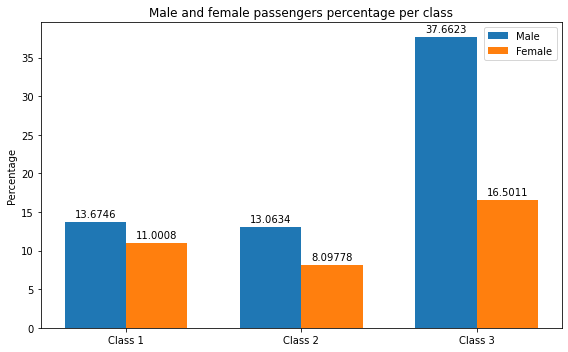

In [31]:
dimensions = (8, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Perc. per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Perc. per Class"], width, label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Male and female passengers percentage per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

In basso è rappresentata l'età media dei passeggeri per classe e sesso in modo visivo. Dal grafico si evidenzia che:
<ul>
    <li>La differenza d'età tra uomini e donne è di 4 anni indipendentemente dalla classe</li>
    <li>La media d'età è descrescente man mano che si abbassa il livello della classe sociale. Questo rafforza ancora una volta la considerazione che i giovani è più probabile che siano immigranti. Però potrebbe anche essere che la media è abbassata da eventuali figli a carico.</li>
</ul>
Questa distribuzione dei dati conferma la correlazione che avevo trovato inizialmente tra età e classe.

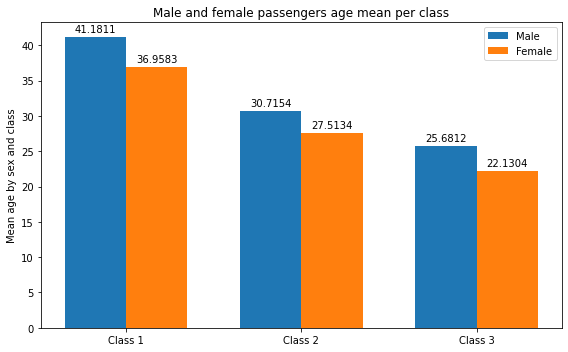

In [32]:
dimensions = (8, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Age Mean per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Age Mean per Class"], width, label='Female')

ax.set_ylabel('Mean age by sex and class')
ax.set_title('Male and female passengers age mean per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

Nel prossimo grafico invece è rappresentata la deviazione standard dell'età per classe e sesso. Si evince che:
<ul>
    <li>la differenza di deviazione standard tra la distribuzione d'età di uomini e donne appartenenti alla medesima classe è piuttosto labile. Proviamo a fare il rapporto tra le deviazioni per classe:</li> 
    <ul>
        <li>Classe 1 : 0.98</li>
        <li>Classe 2 : 0.92</li>
        <li>Classe 3 : 0.96</li>
    </ul>    
    <li>la differenza di deviazione tra la Classe 1 e la Classe 2 è di meno di un anno </li>
    <li>la differenza di deviazione tra la Classe 2 e la Classe 3 è di un circa 3 anni </li>
    
</ul>
Per comprendere meglio il significato che la deviazione standard racchiude, vi ricordo due cose:
<ul>
    <li>la deviazione standard è la variazione media rispetto alla media. Il valore di deviazione non è nient'altro che la variazione in anni media rispetto alla media degli anni.</li>
    <li>un range intorno alla media di una deviazione standard racchiude il 68% dei dati. Un range di due deviazioni standard racchiude il 95% dei dati.</li>
</ul>

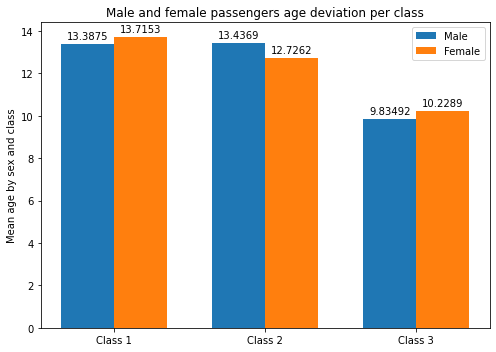

In [33]:
dimensions = (7, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Age Std per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Age Std per Class"], width, label='Female')

ax.set_ylabel('Mean age by sex and class')
ax.set_title('Male and female passengers age deviation per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

4.4 Relation between Sex, Class and Survived
---

Per i sopravvissuti ho deciso di utlizzare solo i dati di train dato che i dati di test non sono etichettati

In [34]:
df_data_train['Survived'] = df_data_train['Survived'].astype("int64")

In [35]:
df_data_train_1 = df_data_train.copy()

Un altro check che possiamo fare è capire qual'è la percentuale di sopravvissuti per classe e pe sesso. 

In [36]:
sr_Survived_Sex_Class = df_data_train_1.groupby(['Sex','Pclass']).Survived.apply((lambda x: (x==1).sum()))
sr_NotSurvived_Sex_Class = df_data_train_1.groupby(['Sex','Pclass']).Survived.apply((lambda x: (x==0).sum()))
sr_SurvivedRatio_Sex_Class = sr_Survived_Sex_Class/(sr_NotSurvived_Sex_Class+sr_Survived_Sex_Class)
df_SurvivedRatio_Sex_Class = pd.merge(sr_SurvivedRatio_Sex_Class[0],sr_SurvivedRatio_Sex_Class[1], left_index=True, right_index=True)
df_SurvivedRatio_Sex_Class = df_SurvivedRatio_Sex_Class.rename(columns={'Survived_x': "Male Ratio Survived per Class"}) 
df_SurvivedRatio_Sex_Class = df_SurvivedRatio_Sex_Class.rename(columns={'Survived_y': "Female Ratio Survived per Class"}) 

Nel grafico sotto ho voluto rappresentare la percentuale di sopravvivenza dei passeggeri divisa per classe e per sesso all'interno della classe. Questo significa che le percentuali che vedete sotto sono riferite al totale dei passeggeri per quella classe e per quel sesso. Vediamolo nel dettaglio:
    <ul>
         <li>Feature <b>Sex</b> : si vede chiaramente un netto divario tra la percentuale di sopravvissuti maschi e femmine. Nella Classe 1 il 97% delle femmine è sopravvissuto mentre dei maschi solo il 37%.</li>    
         <li>Feature <b>Class</b> : si denota una differenza nella sopravvivenza tra le femmine di prima e seconda classe e le femmine di terza classe. C'è anche una netta differenza tra i sopravvissuti maschi della prima classe e i sopravvissuti maschi di seconda e terza classe.</li>
    </ul>

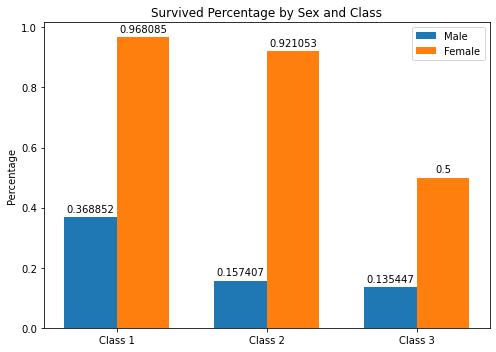

In [37]:
dimensions = (7, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_SurvivedRatio_Sex_Class["Male Ratio Survived per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_SurvivedRatio_Sex_Class["Female Ratio Survived per Class"], width, label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Survived Percentage by Sex and Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

In [38]:
category_train = pd.cut(df_data_train_1.Age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
df_data_train_1.insert(5,'Age Group',category_train)

category_all = pd.cut(df_data_1.Age,bins=[0,2,17,65,99],labels=['0','1','2','3'])
df_data_1.insert(5,'Age Group',category_all)


In [39]:
df_data_1.head()

,Age,Cabin,Embarked,Fare,Name,Age Group,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,2.0,7.2500,"Braund, Mr. Owen Harris",2,0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,2.0,7.9250,"Heikkinen, Miss. Laina",2,0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0,4,1,1,1,1.0,113803
4,35.0,NaN,2.0,8.0500,"Allen, Mr. William Henry",2,0,5,3,0,0,0.0,373450


5 Family
---

We will start by creating fields related to the family unit. The first of these will come from the SibSp and Parch fields, which we can remove later. This will reflect the size of passengers' family. We will also enter a field to indicate whether the passenger is travelling alone or not.

In [40]:
df_data_1['FamilySize'] = df_data_1.Parch + df_data_1.SibSp + 1
df_data_1['IsAlone'] = 0
df_data_1.loc[df_data_1['FamilySize'] == 1, 'IsAlone'] = 1
#df_data_1 = df_data_1.drop(['Parch','SibSp'],axis = 1)

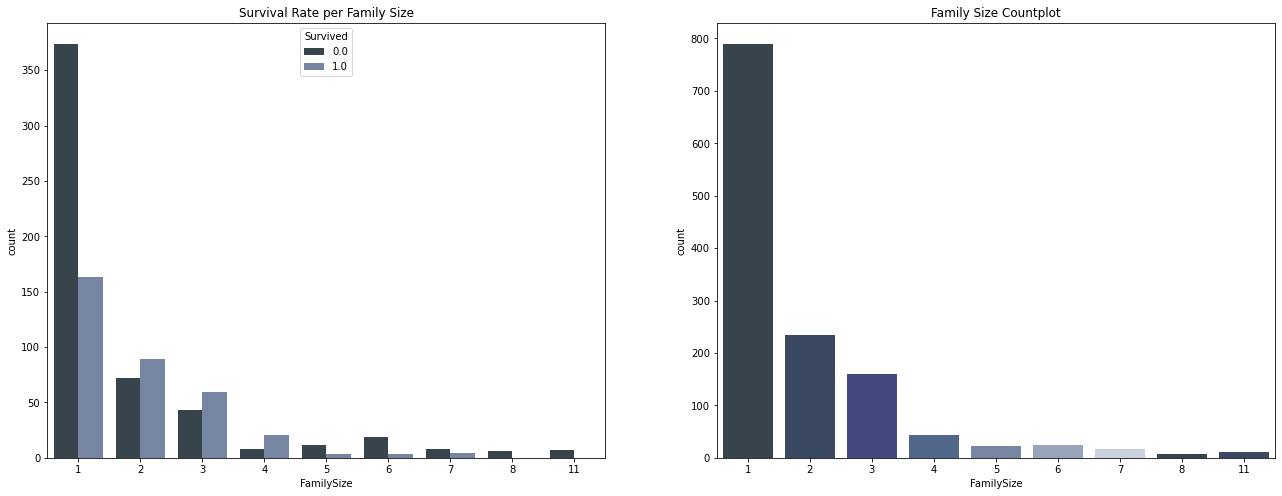

In [41]:
fig, axes = plt.subplots(figsize=(22,8), nrows = 1, ncols = 2)
ax = sns.countplot(x = 'FamilySize', hue='Survived', data = df_data_1, palette = ['#334550','#6D83AA'], ax = axes[0])
ax.set_title('Survival Rate per Family Size')
ax = sns.countplot(x = 'FamilySize', data = df_data_1, palette = ['#334550','#334668','#394184','#496595','#6D83AA','#91A2BF','#C8D0DF'], ax = axes[1])
_ = ax.set_title('Family Size Countplot')

In [42]:
df_data_1['Surname'] = df_data_1['Name'].str.split(', ', expand=True)[0]
df_data_1['Title'] =  df_data_1['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

# Create a new feature identifying children (15 or younger)
df_data_1['IsChild'] = np.where(df_data_1['Age'] < 16, 1, 0)


Grouping Families and Travellers
Sorting the data by Ticket, one finds that multiple passengers share the same ticket number. This can be used as a basis for grouping passengers that travelled together. It will also be useful to distinguish whether these passenger groups are immediate-related (1st-degree) families, entirely unrelated or non-immediate (e.g. friends, cousins), or a mix. We will also identify passengers who are travelling alone. We define:

<ul>
        <li> GroupID: an integer label uniquely identifying each group; a surrogate to Ticket.</li>
        <li>GroupSize: total number of passengers sharing a ticket.</li>
        <li>GroupType: categorization of group into 'Family', 'Non-Family', 'Mixed', 'IsAlone'.</li>
        <li>GroupNumSurvived: number of members in that group which are known to have survived.</li>
        <li>GroupNumPerished: number of members in that group which are known to have perished.</li>
</ul>

In [43]:
# Create mappings for assigning GroupID, GroupType, GroupSize, GroupNumSurvived, 
# and GroupNumPerished 
group_id = 1 
ticket_to_group_id = {} 
ticket_to_group_type = {}  
ticket_to_group_size = {}  
ticket_to_group_num_survived = {}
ticket_to_group_num_perished = {}
for (ticket, group) in df_data_1.groupby('Ticket'):
    #print(str(ticket)+str(group))
    # Categorize group type (Family, Non-Family, Mixed, )
    num_names = len(set(group['Surname'].values))  # number of unique names in this group
    group_size = len(group['Surname'].values)  # total size of this group
    if group_size > 1:
        if num_names == 1:
            ticket_to_group_type[ticket] = 'Family'
        elif num_names == group_size:
            ticket_to_group_type[ticket] = 'NonFamily'
        else:
            ticket_to_group_type[ticket] = 'Mixed'
    else:
        ticket_to_group_type[ticket] = 'IsAlone'
            
    # assign group size and grouop identifier
    ticket_to_group_size[ticket] = group_size
    ticket_to_group_id[ticket] = group_id
    ticket_to_group_num_survived[ticket] = group[group['Survived'] == 1]['Survived'].count()
    ticket_to_group_num_perished[ticket] = group[group['Survived'] == 0]['Survived'].count()
    group_id += 1
    
# Apply the mappings we've just defined to create the GroupID and GroupType variables
df_data_1['GroupID'] = df_data_1['Ticket'].map(ticket_to_group_id)
df_data_1['GroupSize'] = df_data_1['Ticket'].map(ticket_to_group_size)    
df_data_1['GroupType'] = df_data_1['Ticket'].map(ticket_to_group_type)  
df_data_1['GroupNumSurvived'] = df_data_1['Ticket'].map(ticket_to_group_num_survived)
df_data_1['GroupNumPerished'] = df_data_1['Ticket'].map(ticket_to_group_num_perished)

# Let's print the first 4 group entries to check that our grouping was successful
counter = 1
break_point = 4
feature_list = ['Surname', 'FamilySize','Ticket','GroupID','GroupType', 'GroupSize']
print('Printing Sample Data Entries to Verify Grouping:\n')
for (ticket, group) in df_data_1.groupby('Ticket'):
    print('\n', group[feature_list])
    if counter == break_point:
        break
    counter += 1

# Let's also check that GroupNumSurvived and GroupNumPerished were created accurately
feature_list = ['GroupID', 'GroupSize', 'Survived','GroupNumSurvived', 'GroupNumPerished']
df_data_1[feature_list].sort_values(by=['GroupID']).head(15)

Printing Sample Data Entries to Verify Grouping:


     Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
257  Cherry           1  110152        1  NonFamily          3
504  Maioni           1  110152        1  NonFamily          3
759  Rothes           1  110152        1  NonFamily          3

      Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
262  Taussig           3  110413        2    Family          3
558  Taussig           3  110413        2    Family          3
585  Taussig           3  110413        2    Family          3

       Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
110    Porter           1  110465        3  NonFamily          2
475  Clifford           1  110465        3  NonFamily          2

       Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
1226  Maguire           1  110469        4   IsAlone          1


,GroupID,GroupSize,Survived,GroupNumSurvived,GroupNumPerished
504,1,3,1.0,3,0
257,1,3,1.0,3,0
759,1,3,1.0,3,0
585,2,3,1.0,2,1
262,2,3,0.0,2,1
558,2,3,1.0,2,1
110,3,2,0.0,0,2
475,3,2,0.0,0,2
1226,4,1,NaN,0,0
1049,5,1,NaN,0,0


In [44]:
df_data_1

,Age,Cabin,Embarked,Fare,Name,Age Group,Parch,PassengerId,Pclass,Sex,...,FamilySize,IsAlone,Surname,Title,IsChild,GroupID,GroupSize,GroupType,GroupNumSurvived,GroupNumPerished
0,22.0,NaN,2.0,7.2500,"Braund, Mr. Owen Harris",2,0,1,3,0,...,2,0,Braund,Mr,0,721,1,IsAlone,0,1
1,38.0,C85,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,2,1,1,...,2,0,Cumings,Mrs,0,817,2,Family,1,0
2,26.0,NaN,2.0,7.9250,"Heikkinen, Miss. Laina",2,0,3,3,1,...,1,1,Heikkinen,Miss,0,915,1,IsAlone,1,0
3,35.0,C123,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0,4,1,1,...,2,0,Futrelle,Mrs,0,66,2,Family,1,1
4,35.0,NaN,2.0,8.0500,"Allen, Mr. William Henry",2,0,5,3,0,...,1,1,Allen,Mr,0,650,1,IsAlone,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,2.0,8.0500,"Spector, Mr. Woolf",2,0,1305,3,0,...,1,1,Spector,Mr,0,712,1,IsAlone,0,0
1305,39.0,C105,0.0,108.9000,"Oliva y Ocana, Dona. Fermina",2,0,1306,1,1,...,1,1,Oliva y Ocana,Dona,0,835,3,Mixed,1,1
1306,38.5,NaN,2.0,7.2500,"Saether, Mr. Simon Sivertsen",2,0,1307,3,0,...,1,1,Saether,Mr,0,873,1,IsAlone,0,0
1307,25.0,NaN,2.0,8.0500,"Ware, Mr. Frederick",2,0,1308,3,0,...,1,1,Ware,Mr,0,580,1,IsAlone,0,0


6 Checking For Inconsistencies
===

In [45]:
# Check for cases where FamilySize = 1 but GroupType = Family
data_reduced = df_data_1[df_data_1['FamilySize'] == 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'Family']

# nri = 'NumRelatives inconsistency'
nri_passenger_ids = data_reduced['PassengerId'].values
nri_unique_surnames = set(data_reduced['Surname'].values)

# How many occurrences?
print('Number of nri Passengers: ', len(nri_passenger_ids))
print('Number of Unique nri Surnames: ',len(nri_unique_surnames))

# We will find that there are only 7 occurences, so let's go ahead and view them here:
data_reduced = data_reduced.sort_values('Name')
data_reduced[['Name', 'Ticket', 'Fare','Pclass',  'GroupID','GroupSize','GroupType']].head(int(len(nri_passenger_ids)))

Number of nri Passengers:  7
Number of Unique nri Surnames:  4


,Name,Ticket,Fare,Pclass,GroupID,GroupSize,GroupType
83,"Carrau, Mr. Francisco M",113059,47.10,1,36,2,Family
1294,"Carrau, Mr. Jose Pedro",113059,47.10,1,36,2,Family
538,"Risien, Mr. Samuel Beard",364498,14.50,3,588,2,Family
1273,"Risien, Mrs. Samuel (Emma)",364498,14.50,3,588,2,Family
1253,"Ware, Mrs. John James (Florence Louise Long)",CA 31352,21.00,2,777,2,Family
1011,"Watt, Miss. Bertha J",C.A. 33595,15.75,2,765,2,Family
161,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",C.A. 33595,15.75,2,765,2,Family


With the exception of Mrs. John James Ware, we see that each of these passengers is paired with another having the same surname; we can presume that these are 2nd-degree relations (such as cousins), hence why each still has FamilySize=1 (which refers only to immediate family).

In [46]:
#Check for cases where FamilySize > 1 but GroupType = NonFamily
data_reduced = df_data_1[df_data_1['FamilySize'] > 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'NonFamily']

# ngwr = 'not grouped with relatives'
ngwr_passenger_ids = data_reduced['PassengerId'].values
ngwr_unique_surnames = set(data_reduced['Surname'].values)

# How many occurences?
print('Number of ngwr Passengers: ', len(ngwr_passenger_ids))
print('Number of Unique ngwr Surnames: ',len(ngwr_unique_surnames))

feature_list = ['PassengerId', 'Name', 'Ticket', 'Fare','Pclass', 'Parch', 
                'SibSp', 'GroupID', 'GroupSize','GroupType']
data_reduced[feature_list].sort_values('GroupID').head(int(len(ngwr_unique_surnames)))

Number of ngwr Passengers:  17
Number of Unique ngwr Surnames:  17


,PassengerId,Name,Ticket,Fare,Pclass,Parch,SibSp,GroupID,GroupSize,GroupType
166,167,"Chibnall, Mrs. (Edith Martha Bowerman)",113505,55.0000,1,1,0,39,2,NonFamily
356,357,"Bowerman, Miss. Elsie Edith",113505,55.0000,1,1,0,39,2,NonFamily
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",11767,83.1583,1,1,0,76,3,NonFamily
1041,1042,"Earnshaw, Mrs. Boulton (Olive Potter)",11767,83.1583,1,1,0,76,3,NonFamily
571,572,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",11769,51.4792,1,0,2,77,2,NonFamily
1247,1248,"Brown, Mrs. John Murray (Caroline Lane Lamson)",11769,51.4792,1,0,2,77,2,NonFamily
925,926,"Mock, Mr. Philipp Edmund",13236,57.7500,1,0,1,92,2,NonFamily
1013,1014,"Schabert, Mrs. Paul (Emma Mock)",13236,57.7500,1,0,1,92,2,NonFamily
275,276,"Andrews, Miss. Kornelia Theodosia",13502,77.9583,1,0,1,93,3,NonFamily
765,766,"Hogeboom, Mrs. John C (Anna Andrews)",13502,77.9583,1,0,1,93,3,NonFamily


If we look at matching group IDs, then in some cases these inconsistencies may be due to passenger substitutions. However, we need to better understand the significance of the names in parenthesis.

Consider GroupID=628: we have "Miss Elizabith Eustis" and "Mrs. Walter Sephenson (Martha Eustis)". A quick check of geneology databases online reports that there was indeed a miss Mrs. Walter Bertram Stephenson that boarded the Titanic; in this case, Martha Eustis is her maiden name, while Mrs. Walter B. Stephenson gives her title in terms of her husband's name (an old-fashioned practice). Another example is for GroupID=77, where we have "Brown, Mrs. John Murray (Caroline Lane Lamson)" and "Appleton, Mrs. Edward Dale (Charlotte Lamson)", another case of two related passengers whose names are given in terms of those of their husbands.

Since this hunt for inconsistencies turned up only 17 entries, we can manually correct the Group Type in cases (such as these two examples) where it is obvious the passengers are indeed family.

In [47]:
# manually correcting some mislabeled group types
# note: if group size is greater than the number of listed names above, we assign to Mixed
passenger_ids_toFamily = [167, 357, 572, 1248, 926, 1014, 260, 881, 592, 497]
passenger_ids_toMixed = [880, 1042, 276, 766]
#qui sfruttiamo il boolean indexing che è molto comodo ma ha l'unico vincolo che devono essere esplicitati quali indici se 
#vogliono estrapolare e quali non estrapolare
df_data_1['GroupType'][df_data_1['PassengerId'].isin(passenger_ids_toFamily)] = 'Family'
df_data_1['GroupType'][df_data_1['PassengerId'].isin(passenger_ids_toMixed)] = 'Mixed'

## for verification:
# feature_list = ['PassengerId', 'Name', 'GroupID', 'GroupSize','GroupType']
# dataset[feature_list][dataset['PassengerId'].isin(
#         passenger_ids_toFamily)].sort_values('GroupID').head(len(passenger_ids_toFamily))

C:\Users\Fabry\.conda\envs\condaenv11042020\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Fabry\.conda\envs\condaenv11042020\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7 Feature relation with Survived
===

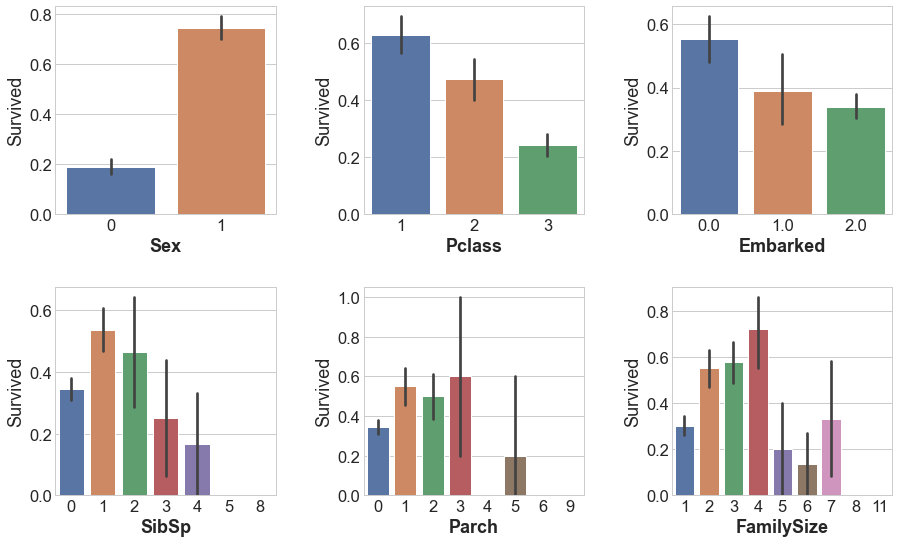

In [48]:
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(x = column,y = 'Survived', data=dataframe)
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'FamilySize']        
barplots(df_data_1, features=feature_list, cols=3, width=15, height=40, hspace=0.35, wspace=0.4)

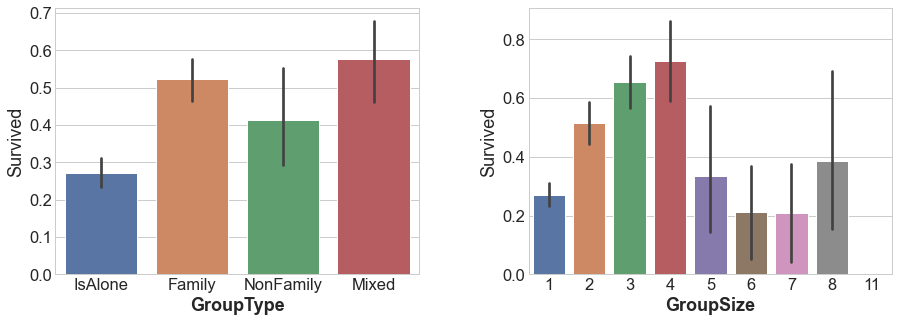

In [49]:
feature_list = ['GroupType','GroupSize']        
barplots(df_data_1, features=feature_list, cols=2, width=15, height=75, hspace=0.3, wspace=0.3)

Note that the black 'error bars' on our plots represent 95% confidence intervals. For practical purposes, when comparing survival versus feature values, these bars can be thought of as statistical uncertainties given our limited sample size and the spread in the data.

Findings:
<ul>
        <li>Sex and Pclass both show a strong statistically significant influence on survival.</li> 
        <li>FamilySize of 2-4 is more advantageous than larger families or passengers without family. Survival drops sharply at 
FamilySize=5 and beyond.</li> 
        <li>Embarked shows no clear trend; we will later investigate this feature in more detail.</li>
        <li>For GroupType, we can clearly see that lone passengers have a lower survival probability compared to other groups (note, this also mirrors what we see for FamilySize=1 and GroupSize=1). Between the other three categories of Family, NonFamily, and Mixed, the wide confidence bounds on the latter two make it difficult to assert whether any of these three have a statistically significant advantage relative to each other.</li> 
        <li>For GroupSize, we see a trend similar to the one we observed for FamilySize, where survival increases up to GroupSize=4, and then drops off sharply for group sizes of 5 and above. However, compared to FamilySize, the confidence bounds for this variable are tighter, and the relation between survival and GroupSize up to 4 appears more linear, suggesting that GroupSize may be a better variable for model training than FamilySize.</li>
</ul>

Given the FamilySize feature, it is not clear whether SibSp and Parch are now gratuitous, or whether they can still offer some valuable insight. This will need further investigation.

8 Fare
===

Our research found that ticket price was cumulative based on the number of passengers sharing that ticket. We therefore define a new fare variable, 'SplitFare', that subdivides the ticket price based on the number of passengers sharing that ticket. We also create 'log10Fare' and 'log10SplitFare' to map these to a base-ten logarithmic scale.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

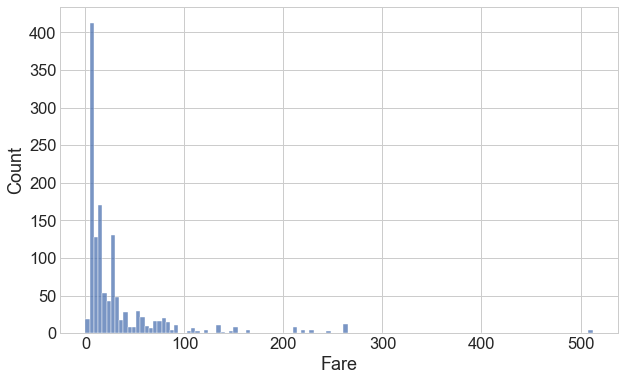

In [50]:
dimensions = (10, 6)
fig, ax = plt.subplots(figsize=dimensions)
sns.histplot(ax = ax, data=df_data_1, x="Fare" , multiple="stack")

La conversione logaritmica in questo caso ha perfettamente senso perchè il range di dati è molto ampio e su scale diverse. Il logaritmo permette di rendere "comparabile" ciò che è molto piccolo con ciò che è molto grande

In [51]:
# split the fare based on GroupSize; express as fare-per-passenger on a shared ticket
df_data_1['SplitFare'] = df_data_1.apply(lambda row: row['Fare']/row['GroupSize'], axis=1)

# Verify new feature definition
features_list = ['GroupSize', 'Fare', 'SplitFare']
df_data_1[features_list].head()

# Map to log10 scale
df_data_1['log10Fare'] = np.log10(df_data_1['Fare'].values + 1)
df_data_1['log10SplitFare'] = np.log10(df_data_1['SplitFare'].values + 1)

In [52]:
#mediana = df_data_1.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
#df_data_1.Fare = df_data_1.Fare.fillna(mediana)

Vogliamo verificare se sussiste un qualche legame tra il prezzo del biglietto complessivo (quindi per nucleo non per singola persona) e la probabilità di sopravvivenza.

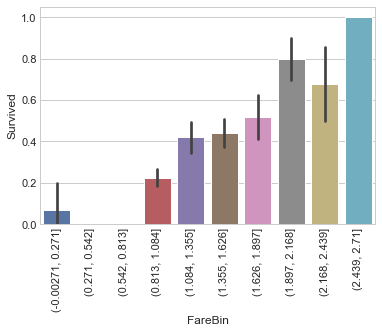

In [53]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
df_data_1['FareBin'] = pd.cut(df_data_1['log10Fare'], bins=10)
g = sns.barplot(x = 'FareBin',y = 'Survived', data=df_data_1)

Dal grafico si vede che la relazione ha un trend crescente e simil-lineare. Se teniamo però conto dell'intervallo di confidenza, rappresentato dai segmenti neri delle singole barre, possiamo dedurre che l'incertezza è abbastanza elevata.

Vogliamo poi verificare se ci sia una qualche diversità, confrontando i prezzi per persona con i sopravvissuti. 

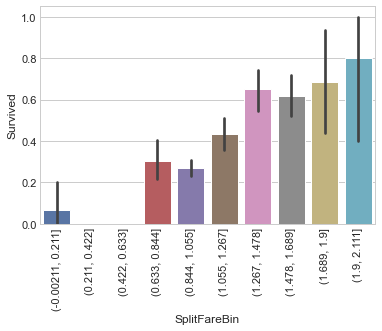

In [54]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
df_data_1['SplitFareBin'] = pd.cut(df_data_1['log10SplitFare'], bins=10)
g = sns.barplot(x = 'SplitFareBin',y = 'Survived', data=df_data_1)

La differenza è irrisoria rispetto al grafico precedente.

9 Cabin
---

IDEE
- rappresentazione della raccolta dei passeggeri attraverso la distribuzione dei punti con una rete neurale

Findings:

CabinDeck appears to have no significant influence on survival.
A few other comments:

The cabin data we have exists predominantly for members of Pclass=1; it is missing for nearly all other passengers.

We know that gates in some of the stairwells leading to higher decks were left shut, due to the segregation of 3rd-class passengers from the rest. This of course mainly impacted survival in Pclass=3.

The iceberg penetrated the Titanic below deck G. Hence, there wasn't any localized damage/flooding directly to any of the cabins we are considering.

Lower-class passengers were not necessarily on lower decks than higher-class passengers. The following schematic of passenger class cabin distributions shows that most decks contained a mix of classes, albeit 3rd-class passengers tended to be far towards the rear or front of the ship:


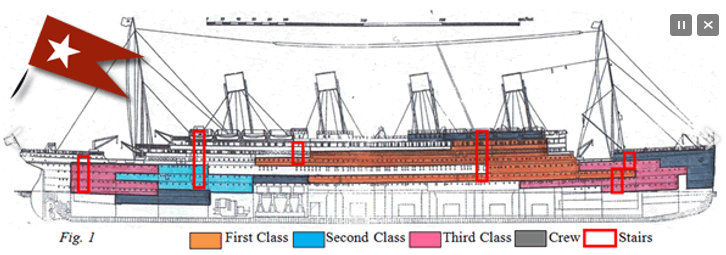

**<span style='color:#F1C40F'>Cabin</span>** feature is little bit tricky and it needs further exploration. The large portion of the Cabin feature is missing and the feature itself **<span style='color:#F1C40F'>can't be ignored completely because some the cabins might have higher survival rates</span>**. It turns out to be the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)
* On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
* **A**, **B** decks were only for 1st class passengers and 2st class passengers (smoking rooms)
* **C** first class for the majority and a minority of crew, second class and thrid class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers


https://www.encyclopedia-titanica.org/cabins.html
FIRST CLASS
- Boat Deck			6 cabins, accommodation for 7 people.
- "T"	Blackwell, Mr Stephen Weart	Cave List	There is no evidence that anyone else occupied a Boat Deck cabin.
- A Deck			36 cabins, accommodation for 48 people.
- B Deck            101 numbered cabins, 2 of which are sitting rooms. Therefore it has 99 bedrooms with accomodation for 183 passengers.
- C Deck            Has 137 numbered cabins, 2 of which are sitting rooms. Therefore 135 cabins are able to accommodate 315 passengers.
- D Deck			Has a total of 49 cabins, being able to accommodate 119 passengers.
- E Deck			Has a total of 71 cabins, being able to accommodate 184 passengers.

SECOND CLASS
- dsfasad
- fasds


THIRD CLASS
- sfsd
- fasfs

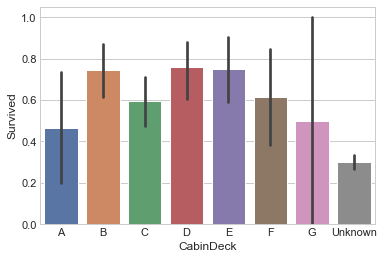

In [55]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_data_1['CabinDeck'] = df_data_1['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'Unknown')
sns.set(font_scale=1)
plt.style.use('seaborn-whitegrid')
g = sns.barplot(x = 'CabinDeck',y = 'Survived', data=df_data_1[df_data_1['CabinDeck'] != 'T'].sort_values('CabinDeck'))

10 Cabin and Fare relation
---

In [56]:
df_data_1.head()

,Age,Cabin,Embarked,Fare,Name,Age Group,Parch,PassengerId,Pclass,Sex,...,GroupSize,GroupType,GroupNumSurvived,GroupNumPerished,SplitFare,log10Fare,log10SplitFare,FareBin,SplitFareBin,CabinDeck
0,22.0,NaN,2.0,7.2500,"Braund, Mr. Owen Harris",2,0,1,3,0,...,1,IsAlone,0,1,7.25000,0.916454,0.916454,"(0.813, 1.084]","(0.844, 1.055]",Unknown
1,38.0,C85,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,2,1,1,...,2,Family,1,0,35.64165,1.859038,1.563975,"(1.626, 1.897]","(1.478, 1.689]",C
2,26.0,NaN,2.0,7.9250,"Heikkinen, Miss. Laina",2,0,3,3,1,...,1,IsAlone,1,0,7.92500,0.950608,0.950608,"(0.813, 1.084]","(0.844, 1.055]",Unknown
3,35.0,C123,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0,4,1,1,...,2,Family,1,1,26.55000,1.733197,1.440122,"(1.626, 1.897]","(1.267, 1.478]",C
4,35.0,NaN,2.0,8.0500,"Allen, Mr. William Henry",2,0,5,3,0,...,1,IsAlone,0,1,8.05000,0.956649,0.956649,"(0.813, 1.084]","(0.844, 1.055]",Unknown


In [58]:
Test1=df_data_1.groupby(['Pclass','GroupSize','Age Group','CabinDeck']).SplitFare.mean()
Test1.to_csv("Test1.csv")

In [59]:
df_data_1.groupby(['Pclass','GroupSize','CabinDeck']).SplitFare.std()

Pclass  GroupSize  CabinDeck
1       1          A            10.939411
                   B            15.129310
                   C             6.750713
                   D             2.766014
                   E             3.876758
                   T                  NaN
                   Unknown      10.165535
        2          A             1.742735
                   B            11.588381
                   C            11.588514
                   D             6.788454
                   E             1.480793
                   Unknown      13.993203
        3          A             0.000000
                   B            23.490895
                   C             8.848032
                   D             5.991169
                   E             0.640525
                   Unknown       6.499490
        4          B            41.624878
                   C            11.731415
                   Unknown      37.176561
        5          C             1.658745
     

In [60]:
df_data_1.groupby(['Pclass','GroupSize','CabinDeck']).SplitFare.count()

Pclass  GroupSize  CabinDeck
1       1          A             17
                   B             12
                   C             21
                   D             11
                   E             10
                   T              1
                   Unknown       34
        2          A              2
                   B             24
                   C             27
                   D             20
                   E             13
                   Unknown       20
        3          A              3
                   B              9
                   C             16
                   D              9
                   E              6
                   Unknown        2
        4          B             14
                   C             12
                   Unknown        6
        5          C              8
                   E              5
                   Unknown        2
        6          C             10
                   Unknown        2

In [61]:
np.where(df_data_1['Age'] < 16, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

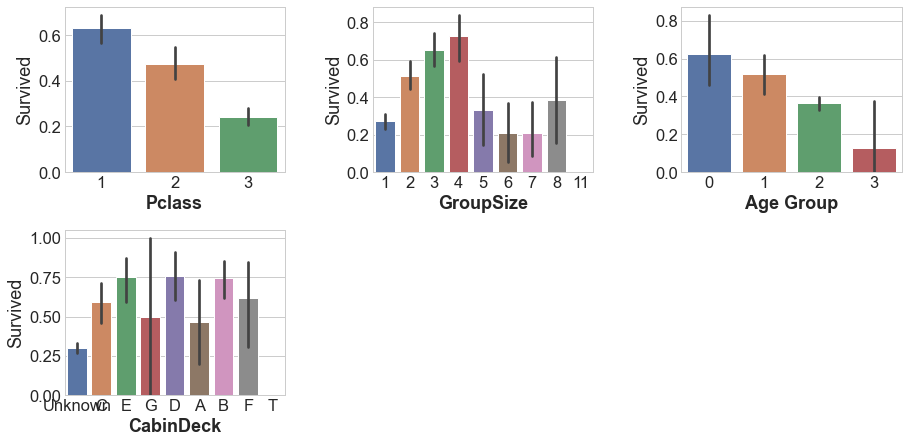

20 Correlation without NaNs
---

In [ ]:
jp1 = sns.jointplot(x="Pclass", y="Fare", kind='reg', data=df_data_1)
r, p = stats.pearsonr(df_data_1["Pclass"], df_data_1["Fare"])
phantom, = jp1.ax_joint.plot([], [], linestyle="", alpha=0)
jp1.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

In [ ]:
t0 = time()
X_train = 
n_components = 4
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))